<b>ОГЛАВЛЕНИЕ</b>


    
### <a href='#step_1'>Шаг 1. Изучение и предобработка данных</a> 

#### Шаг 1.1<a href='#step_12'> Импортируем библиотеки и изучим данные</a>
    
#### Шаг 1.2<a href='#step_12'> Предобработка данных</a>
    
### <a href='#step_2'>Шаг 2. Подготовка данных</a>     

#### Шаг 2.1<a href='#step_2'> Подготовка данных</a>

#### Шаг 2.2<a href='#step_22'> Подсчет выручки</a>a

### <a href='#step_3'>Шаг 3. Проанализируем данные</a>    

### <a href='#step_4'>Шаг 4. Гипотезы</a>     



### <a href='#step_5'>Шаг 5. Вывод</a> 

## Шаг 1. Изучение и предобработка данных
<a id='step_1'></a>

### 1.1 Импортируем библиотеки и изучим данные.
<a id='step_11'></a>

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv', sep=',')
df_internet = pd.read_csv('/datasets/internet.csv', sep=',')
df_message = pd.read_csv('/datasets/messages.csv', sep=',')
df_tarrifs = pd.read_csv('/datasets/tariffs.csv', sep=',')
df_users = pd.read_csv('/datasets/users.csv', sep=',')

In [3]:
print(display(df_calls.head()), end='\n\n')
print((df_calls.info()))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [4]:
display(df_calls.head())
print(df_calls.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [5]:
print(display(df_internet.head()), end='\n\n')
print(df_internet.info())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


In [6]:
print(display(df_message.head()), end='\n\n')
print(df_message.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


In [7]:
print(display(df_tarrifs.head()), end='\n\n')
print(df_tarrifs.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


In [8]:
print(display(df_users.head()), end='\n\n')
print(df_users.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


### Вывод:
Мы изучили основную информацию о пяти датафреймах, данные о совершенных телефонных звонках, о количестве потраченного интернет трафика, отправленных смс сообщений, о пользователях и тарифах.

На первый взгляд, пропущенные значения содержатся только в данных о пользователях.
В ряде таблиц присутсвуют типы данных подлежащих замене на иной, например стобец с датой.

### 1.2 Предобработка данных

<a id='step_12'></a>

##### Сначала разберемся с пропущенными значениями.
Заменим пропуски в таблице users в столбце curn_date на нули.

In [9]:
df_users.churn_date.fillna(0, inplace=True)
df_users.churn_date.isna().sum()

0

##### Займемся типом данных.
Изменим тип данных в столбцах с датой на datetime64 и добавим столбцы с номером месяца.

In [10]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_message['message_date'] = pd.to_datetime(df_message['message_date'], format='%Y-%m-%d')
df_message['month'] = pd.DatetimeIndex(df_message['message_date']).month
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

##### Здесь мы изучим более подробно данные и поищем ошибки.


In [11]:
df_calls.describe()

,duration,user_id,month
count,202607.000000,202607.000000,202607.000000
mean,6.755887,1253.940619,8.574067
std,5.843365,144.722751,2.787093
min,0.000000,1000.000000,1.000000
25%,1.300000,1126.000000,7.000000
50%,6.000000,1260.000000,9.000000
75%,10.700000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000


Здесь мы наблюдаем присутсвие нулевых значений по длительности звонка.

Проверим долю звонков с длительностью 0 в общей массе звонков по клиенту, а так же общее количество таких звонков.

In [12]:
round(((df_calls
        .query('duration == 0')
        .groupby('user_id').count() / 
         df_calls.groupby('user_id')
        .count()) * 100)
        .sort_values(by='id', ascending=False)).id


user_id
1257    50.0
1181    32.0
1398    30.0
1016    30.0
1373    29.0
        ... 
1286    13.0
1406    13.0
1103    12.0
1206    12.0
1084     9.0
Name: id, Length: 492, dtype: float64

In [13]:
df_calls.query('duration == 0').id.count()

39613

Мы наблюдаем большое количество нулевых значений по данным о длительности звонка. Так же мы наблюдаем большую долю таких звонков у каждого абонента. Вероятно это объясняется автоматическим обзвоном рекламных роботов, но нельзя исключать и нарушения в системе подсчета минут, т.к. доля нулевых значений в выборке составляет 20%!

Для корректного проведения анализа мы отбросим данные с нулевыми значениями.

In [14]:
df_calls = df_calls[df_calls['duration'] != 0]

##### Посмотрим на данные об интернет трафике.

In [15]:
print(display(df_internet.head()))
print(df_internet.describe())

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


None
          Unnamed: 0        mb_used        user_id          month
count  149396.000000  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842       8.563315
std     43127.054745     278.300951     144.050823       2.788717
min         0.000000       0.000000    1000.000000       1.000000
25%     37348.750000     138.187500    1130.000000       7.000000
50%     74697.500000     348.015000    1251.000000       9.000000
75%    112046.250000     559.552500    1380.000000      11.000000
max    149395.000000    1724.830000    1499.000000      12.000000


Здесь мы видим задублированный столбец с индексами строк, удалим его.

In [16]:
df_internet = df_internet.drop('Unnamed: 0', axis=1)

Так же мы заметили нулевое значение в столбце с трафиком.
Изучим подробнее количество нулевых значений.

In [17]:
df_internet.query('mb_used == 0.0').count().id

19598

In [18]:
round(((df_internet
        .query('mb_used == 0')
        .groupby('user_id').count() / 
         df_internet.groupby('user_id')
        .count()) * 100)
        .sort_values(by='id', ascending=False)).id

user_id
1434    25.0
1041    24.0
1190    24.0
1351    23.0
1322    22.0
        ... 
1201     1.0
1309     1.0
1343     NaN
1397     NaN
1399     NaN
Name: id, Length: 497, dtype: float64

In [19]:
df_internet.query('mb_used == 0').id.count() / df_internet.shape[0]

0.13118155773916304

В этих данных аналогичная ситуация предыдущим.
Мы избавимся от нулевых значений в выборке.

In [20]:
df_internet = df_internet[df_internet['mb_used'] != 0]

### Вывод:
В процессе предобработки данных, мы выявили значительную массу звонков с нулевой длительностью, и предположили причины связанные с такими аномалиями (сбои в системе хранения данных либо использование номеров для автообзвона). Мы избавились от таких значений во избежание искажения результатов анализа.

То же самое мы обнаружили и с данными об использовании интернет трафика, большая доля нулевых значений, возможно причина в нарушениях процесса хранения данных.

## Глава 2. Подготовка данных.
<a id='step_2'></a>

### 2.1 Подготовка данных

Для начала округлим вверх значения в столбце длительность звонков .

In [21]:
df_calls['duration'] = df_calls.duration.apply(lambda x: math.ceil(x))

Здесь мы посчитаем количество звонков в месяц и их длительность на каждого абонента.

In [22]:

df_calls_per_month = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
df_calls_per_month.columns = ['count_of_calls', 'sum_duration']
df_calls_per_month = df_calls_per_month.reset_index()
df_calls_per_month.head()

,user_id,month,count_of_calls,sum_duration
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466


Здесь мы посчитаем количество смс в месяц на каждого абонента.

In [23]:
df_message_per_month = df_message.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
df_message_per_month.columns = ['count_of_sms']
df_message_per_month = df_message_per_month.reset_index()
df_message_per_month.head()

,user_id,month,count_of_sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


А здесь мы посчитаем количество потраченного трафика каждым пользователем по месяцам.

In [24]:
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])
df_internet['mb_used'] = df_internet['mb_used'].astype('int64')

In [25]:
df_internet_per_month = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
df_internet_per_month.columns = ['traffic_sum']
df_internet_per_month = df_internet_per_month.reset_index()
df_internet_per_month.head()

,user_id,month,traffic_sum
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


Объединим получившиеся датафреймы в один сет.

In [26]:
#%%timeit
merged = df_calls_per_month.merge(df_message_per_month, how='outer', on=['user_id', 'month'], left_on=None, right_on=None, left_index=False)
merged = merged.merge(df_internet_per_month, how='outer', on=['user_id', 'month'], left_on=None, right_on=None, left_index=False)
merged = merged.merge(df_users, how='outer', on=None, left_on=None, right_on=None, left_index=False)

# Переименуем столбец тариф в tariff_name чтобы по нему сделать merge
merged.columns = ['user_id', 'month', 'count_of_calls', 'sum_duration', 'count_of_sms',
                   'traffic_sum', 'age', 'churn_date', 'city', 'first_name', 'last_name',
                   'reg_date', 'tariff_name']
merged = merged.merge(df_tarrifs, how='outer', on='tariff_name', left_on=None, right_on=None, left_index=False)

In [27]:
# Удалим строки, в которых отсутсвовали все значения по всем расходам 
merged = merged.query('user_id not in [1128, 1371]')
merged[merged['month'].isna()].count().sum()

0

In [28]:
merged.fillna(0, inplace=True)
merged.isna().sum().sum()

0

### 2.2 Подсчет выручки
<a id='step_22'></a>

Посчитаем выручку по сериям датафрейма применив условие на неотрицательность значений

In [29]:
#%%timeit

profit_per_user = (
(merged.sum_duration - merged.minutes_included).apply(lambda x: 0 if x < 0 else x) * merged.rub_per_minute +
(merged.count_of_sms - merged.messages_included).apply(lambda x: 0 if x < 0 else x) * merged.rub_per_message +
((merged.traffic_sum - merged.mb_per_month_included).apply(lambda x: 0 if x < 0 else x) * merged.rub_per_gb) / 1024 +
 merged.rub_monthly_fee
).round()


Добавим столбец с выручкой на клиента в таблицу

In [30]:
merged['profit_per_user'] = profit_per_user
merged.head()

,user_id,month,count_of_calls,sum_duration,count_of_sms,traffic_sum,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit_per_user
0,1000,5.0,17.0,159.0,22.0,2256.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,28.0,172.0,60.0,23257.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,41.0,340.0,75.0,14016.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,42.0,408.0,81.0,14070.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,46.0,466.0,57.0,14581.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


In [31]:
merged.tail(2)

,user_id,month,count_of_calls,sum_duration,count_of_sms,traffic_sum,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit_per_user
3213,1489,11.0,0.0,0.0,20.0,17516.0,35,0,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,971.0
3214,1489,12.0,0.0,0.0,35.0,17341.0,35,0,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,937.0


### Вывод
Мы подготовили данные к анализу:

Округлили значения столбцов длительность звонка и размер интернет трафика до целого значения вверх;

Посчитали каждый показатель в разрезе юзер - месяц;

Свели все данные в одну таблицу;

Посчитали выручку по каждому юзеру;

## Шаг 3. Проанализируем данные
<a id='step_3'></a>

In [34]:
print(display(df_tarrifs), end='\n\n')

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None



In [35]:
merged

,user_id,month,count_of_calls,sum_duration,count_of_sms,traffic_sum,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit_per_user
0,1000,5.0,17.0,159.0,22.0,2256.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,28.0,172.0,60.0,23257.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,41.0,340.0,75.0,14016.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,42.0,408.0,81.0,14070.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,46.0,466.0,57.0,14581.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,1489,8.0,0.0,0.0,17.0,11066.0,35,0,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,550.0
3211,1489,9.0,0.0,0.0,32.0,17232.0,35,0,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,916.0
3212,1489,10.0,0.0,0.0,21.0,19588.0,35,0,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,1376.0
3213,1489,11.0,0.0,0.0,20.0,17516.0,35,0,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,971.0


standard_deviation smart 190
standard_deviation ultra 318
variance smart 36219
variance ultra 100874
Среднее по выборке smart 418.0
Среднее по выборке ultra 527.0
Медиана smart 422.0
Медиана ultra 518.0
Вероятность превысить лимит пакета минут по тарифу smart 0.333


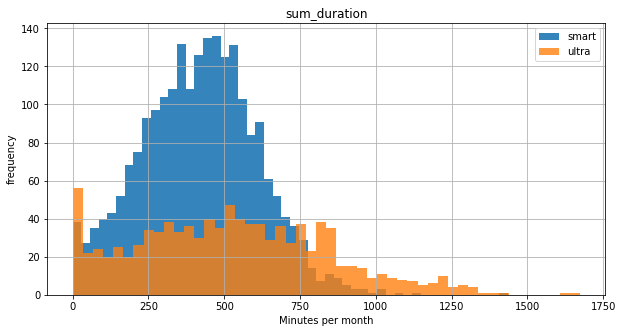

In [35]:
x = merged.query('tariff_name == "smart"').sum_duration
y = merged.query('tariff_name == "ultra"').sum_duration
variance_x = round(np.var(x, ddof=1))
variance_y = round(np.var(y, ddof=1))
standard_deviation_x = round(np.std(x, ddof=1))
standard_deviation_y = round(np.std(y, ddof=1))
print ('standard_deviation smart', standard_deviation_x)
print ('standard_deviation ultra', standard_deviation_y)
print('variance smart', variance_x)
print('variance ultra', variance_y)
print('Среднее по выборке smart', x.mean().round())
print('Среднее по выборке ultra', y.mean().round())
print('Медиана smart', x.median())
print('Медиана ultra', y.median())

result = 1 - st.norm(x.mean().round(), standard_deviation_x).cdf(500) # считаем вероятность получить значение больше x 
print('Вероятность превысить лимит пакета минут по тарифу smart', round(result, 4))

plt.figure(figsize=(10, 5))
labels= ["smart","ultra"]
plt.xlabel('Minutes per month')
plt.ylabel('frequency')
plt.title('sum_duration')
plt.hist(x, bins=50, histtype='bar', label='smart', alpha=.9)
plt.hist(y, bins=50, histtype='bar', label='ultra', alpha=.79)
plt.grid(True)
plt.legend(labels)
plt.show() 

На графике мы наблюдаем распределения тарифов по среднемесячной длительности звонков. Оба распределения похожи на нормальное.

У тарифа smart существенно меньше стандартное отклонение чем у тарифа ultra, что обуславливается сосредотачением основной массы выборки тарифа smart в зоне от 0 до 800 минут в месяц, в то время как, тариф ultra распределен более широко от 0 до 1450(за исключением выбросов).

Итак, среднее значение и медиана по тарифу ultra больше ср. знач. и медианы тарифа smart на 26% и 22% соответственно, а значит в среднем пользователи тарифа ultra больше пользуются телефонными звонками.

Но при этом мы видим, что больше 90% пользователей тарифа ultra не используют даже половину пакета в 3 000 минут мобильной связи, в то время как пользователи тарифа smart с вероятностью 30% превышают лимит.

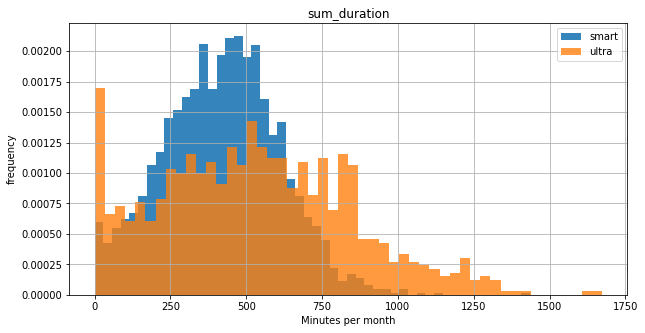

In [47]:
x = merged.query('tariff_name == "smart"').sum_duration
y = merged.query('tariff_name == "ultra"').sum_duration

plt.figure(figsize=(10, 5))
labels= ["smart","ultra"]
plt.xlabel('Minutes per month')
plt.ylabel('frequency')
plt.title('sum_duration')
plt.hist(x, bins=50, histtype='bar', label='smart', alpha=.9, density=True)
plt.hist(y, bins=50, histtype='bar', label='ultra', alpha=.79, density=True)
plt.grid(True)
plt.legend(labels)
plt.show() 

standard_deviation smart 28
standard_deviation ultra 48
variance smart 797
variance ultra 2285
Среднее по выборке smart 33.0
Среднее по выборке ultra 49.0
Медиана smart 28.0
Медиана ultra 38.0
Вероятность превысить лимит пакета смс по тарифу smart 0.2719


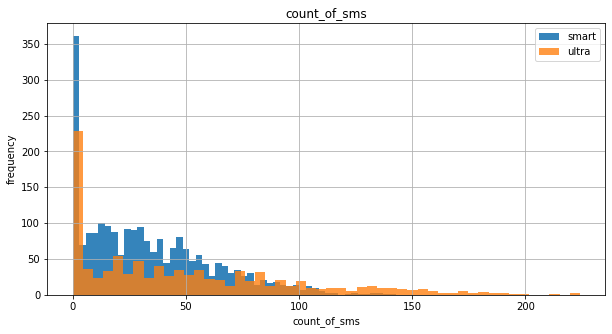

In [36]:
x = merged.query('tariff_name == "smart"').count_of_sms
y = merged.query('tariff_name == "ultra"').count_of_sms
variance_x = round(np.var(x, ddof=1))
variance_y = round(np.var(y, ddof=1))
standard_deviation_x = round(np.std(x, ddof=1))
standard_deviation_y = round(np.std(y, ddof=1))
print ('standard_deviation smart', standard_deviation_x)
print ('standard_deviation ultra', standard_deviation_y)
print('variance smart', variance_x)
print('variance ultra', variance_y)
print('Среднее по выборке smart', x.mean().round())
print('Среднее по выборке ultra', y.mean().round())
print('Медиана smart', x.median())
print('Медиана ultra', y.median())

result = 1 - st.norm(x.mean().round(), standard_deviation_x).cdf(50) # считаем вероятность получить значение больше x 
print('Вероятность превысить лимит пакета смс по тарифу smart', round(result, 4))

plt.figure(figsize=(10, 5))
labels= ["smart","ultra"]
plt.xlabel('count_of_sms')
plt.ylabel('frequency')
plt.title('count_of_sms')
plt.hist(x, bins=50, histtype='bar', label='smart', alpha=.9)
plt.hist(y, bins=50, histtype='bar', label='ultra', alpha=.79)
plt.grid(True)
plt.legend(labels)
plt.show()

На данном графике мы видим распределения тарифов по количеству смс сообщений в месяц. Графиуи весьма схожи и скошены вправо, но у тарифа ultra "хвост" распределяется далеко вправо, в то время как у тарифа  smart максимальные значение едва ли превышают  отметку со значением 120.

Очевидно, что большая часть пользователей тарифа ultra не испоьлзуют весь включенный пакет смс, однако пользователи тарифа smart с вероятностью в 30% превышают этот лимит.

standard_deviation smart 5878
standard_deviation ultra 10096
variance smart 34545911
variance ultra 101935621
Среднее по выборке smart 16229.0
Среднее по выборке ultra 19487.0
Медиана smart 16531.0
Медиана ultra 19324.0
Вероятность превысить лимит интернет пакета по тарифу smart 0.5588
Вероятность превысить лимит интернет пакета по тарифу ultra 0.1329


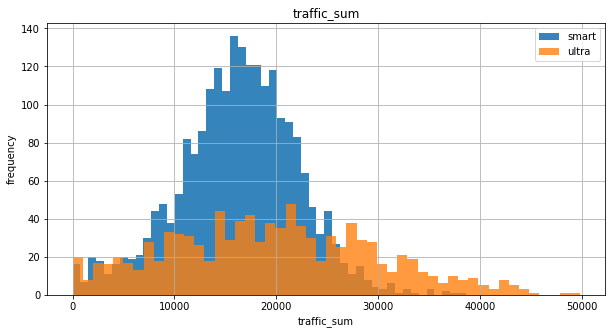

In [37]:
x = merged.query('tariff_name == "smart"').traffic_sum
y = merged.query('tariff_name == "ultra"').traffic_sum
variance_x = round(np.var(x, ddof=1))
variance_y = round(np.var(y, ddof=1))
standard_deviation_x = round(np.std(x, ddof=1))
standard_deviation_y = round(np.std(y, ddof=1))
print ('standard_deviation smart', standard_deviation_x)
print ('standard_deviation ultra', standard_deviation_y)
print('variance smart', variance_x)
print('variance ultra', variance_y)
print('Среднее по выборке smart', x.mean().round())
print('Среднее по выборке ultra', y.mean().round())
print('Медиана smart', x.median())
print('Медиана ultra', y.median())

result = 1 - st.norm(x.mean().round(), standard_deviation_x).cdf(15360) # считаем вероятность получить значение больше x 
print('Вероятность превысить лимит интернет пакета по тарифу smart', round(result, 4))
result = 1 - st.norm(y.mean().round(), standard_deviation_y).cdf(30720) # считаем вероятность получить значение больше x 
print('Вероятность превысить лимит интернет пакета по тарифу ultra', round(result, 4))

plt.figure(figsize=(10, 5))
labels= ["smart","ultra"]
plt.xlabel('traffic_sum')
plt.ylabel('frequency')
plt.title('traffic_sum')
plt.hist(x, bins=50, histtype='bar', label='smart', alpha=.9)
plt.hist(y, bins=50, histtype='bar', label='ultra', alpha=.79)
plt.grid(True)
plt.legend(labels)
plt.show()

На данном графики распределены тарифы по использованному за месяц интернет трафику. Оба распределения напоминают нормальное, у smart стандартное отклонение меньше, т.к лимит тоже меньше. Однако в данной категории пользователи обоих тарифов склонны к превышению лимита пакета трафика. 

Пользователи тарифа smart превышают лимит с вероятностью 56%, а тарифа ultra с вероятностью 13%.

#### Возникает вопрос - какой же тариф все таки выгоднее? 


standard_deviation smart 788
standard_deviation ultra 356
variance smart 620458
variance ultra 126944
Среднее по выборке smart 1233.0
Среднее по выборке ultra 2061.0
Медиана smart 960.0
Медиана ultra 1950.0
Вероятность превысить лимит интернет пакета по тарифу smart 0.8066
Вероятность превысить лимит интернет пакета по тарифу ultra 0.6213


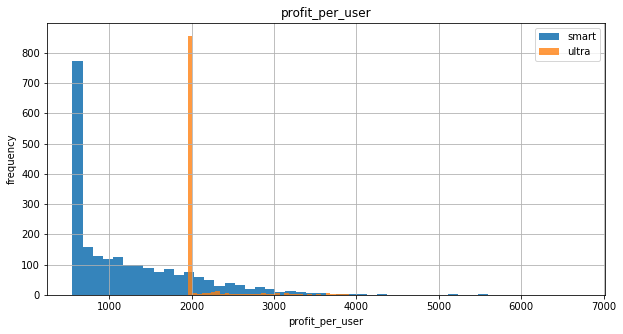

In [38]:
x = merged.query('tariff_name == "smart"').profit_per_user
y = merged.query('tariff_name == "ultra"').profit_per_user

variance_x = round(np.var(x, ddof=1))
variance_y = round(np.var(y, ddof=1))
standard_deviation_x = round(np.std(x, ddof=1))
standard_deviation_y = round(np.std(y, ddof=1))
print ('standard_deviation smart', standard_deviation_x)
print ('standard_deviation ultra', standard_deviation_y)
print('variance smart', variance_x)
print('variance ultra', variance_y)
print('Среднее по выборке smart', x.mean().round())
print('Среднее по выборке ultra', y.mean().round())
print('Медиана smart', x.median())
print('Медиана ultra', y.median())

result = 1 - st.norm(x.mean().round(), standard_deviation_x).cdf(551) # считаем вероятность получить значение больше x 
print('Вероятность превысить лимит интернет пакета по тарифу smart', round(result, 4))
result = 1 - st.norm(y.mean().round(), standard_deviation_y).cdf(1951) # считаем вероятность получить значение больше x 
print('Вероятность превысить лимит интернет пакета по тарифу ultra', round(result, 4))


plt.figure(figsize=(10, 5))
labels= ["smart","ultra"]
plt.xlabel('profit_per_user')
plt.ylabel('frequency')
plt.title('profit_per_user')
plt.hist(x, bins=50, histtype='bar', label='smart', alpha=.9)
plt.hist(y, bins=50, histtype='bar', label='ultra', alpha=.79)
plt.grid(True)
plt.legend(labels)
plt.show()

На данном графике мы видим, что у тарифа smart больше потенциала в превышении лимитов пакета, пользователи этого тарифа с вероятностью 80% превышали лимит.

Соответственно и больше потенциала для увеличения выручки.

Теперь посмотрим на распределение доли использованного пакета тарифа смарт.

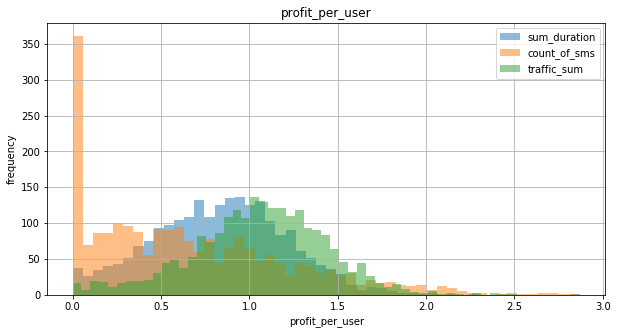

In [39]:
x = merged.query('tariff_name == "smart"').sum_duration / merged.query('tariff_name == "smart"').minutes_included
y = merged.query('tariff_name == "smart"').count_of_sms / merged.query('tariff_name == "smart"').messages_included
z = merged.query('tariff_name == "smart"').traffic_sum / merged.query('tariff_name == "smart"').mb_per_month_included

plt.figure(figsize=(10, 5))
labels= ["sum_duration","count_of_sms", 'traffic_sum']
plt.xlabel('profit_per_user')
plt.ylabel('frequency')
plt.title('profit_per_user')
plt.hist(x, bins=50, histtype='bar', label='smart', alpha=.5)
plt.hist(y, bins=50, histtype='bar', label='ultra', alpha=.5)
plt.hist(z, bins=50, histtype='bar', label='ultra', alpha=.5)
plt.grid(True)
plt.legend(labels)
plt.show()

ЗДесь мы видим, что смс сообщения пользуются меньшей популярностью, чем интернет и телефонные звонки. Примерно половина выборки израсходует весь тарифный пакет и продолжает пользоваться услугами за доп плату, но при этом средняя стоимость(выручка) за месяц всетаки сильно меньше стоимости тарифа ultra, где пакет услуг намного больше. Из=за этого пользователи предпочитают более доступный тариф.

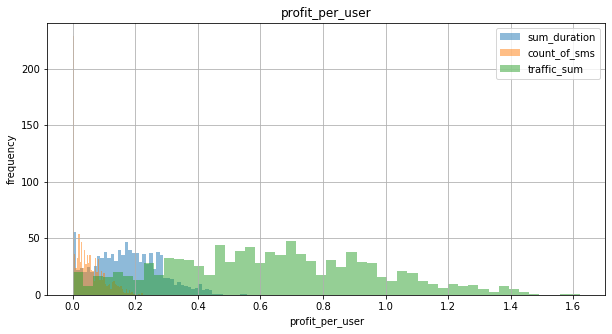

In [40]:
x = merged.query('tariff_name == "ultra"').sum_duration / merged.query('tariff_name == "ultra"').minutes_included
y = merged.query('tariff_name == "ultra"').count_of_sms / merged.query('tariff_name == "ultra"').messages_included
z = merged.query('tariff_name == "ultra"').traffic_sum / merged.query('tariff_name == "ultra"').mb_per_month_included

plt.figure(figsize=(10, 5))
labels= ["sum_duration","count_of_sms", 'traffic_sum']
plt.xlabel('profit_per_user')
plt.ylabel('frequency')
plt.title('profit_per_user')
plt.hist(x, bins=50, histtype='bar', label='smart', alpha=.5)
plt.hist(y, bins=50, histtype='bar', label='ultra', alpha=.5)
plt.hist(z, bins=50, histtype='bar', label='ultra', alpha=.5)
plt.grid(True)
plt.legend(labels)
plt.show()

    На данном графике мы видим распределение долей использованных услуг от пакета по месяцам тарифа ultra. Сразу бросается в глаза, что смс и звонки не расходуются даже на половину от пакета, а интернет большей частью распределен до всего пакета, но так же есть и превышения. Пакет предоставляемый данным тарифом на 15гб больше, чем в смарте, и эти 15 гб стоят примерно 3т.р. Логично предположить, что пакет ultra берут только ради большого объема интернет трафика в пакете.

## Шаг 4. Гипотезы
Сформируем гипотезы и проверим их.
<a id='step_4'></a>

H₀ средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается;

H₁ средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;


In [41]:
mean_profit_of_smart = merged.query('tariff_name == "smart"').profit_per_user.mean().round()
mean_profit_of_ultra = merged.query('tariff_name == "ultra"').profit_per_user.mean().round()
profit_of_smart = merged.query('tariff_name == "smart"').profit_per_user
profit_of_ultra = merged.query('tariff_name == "ultra"').profit_per_user

In [42]:
st.levene(profit_of_smart.dropna(), profit_of_ultra.dropna())

LeveneResult(statistic=565.327610399644, pvalue=3.0419718251034213e-115)

In [43]:
t, p = st.ttest_ind(profit_of_smart.dropna(), profit_of_ultra.dropna(), equal_var = False)
t, p

(-40.98974132065834, 8.911718216991379e-296)

In [44]:
alpha = .05

results = st.ttest_1samp(
    profit_of_smart,
    mean_profit_of_ultra)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('\nmean_profit_of_smart', mean_profit_of_smart, '\nmean_profit_of_ultra', mean_profit_of_ultra)

p-значение:  0.0
Отвергаем нулевую гипотезу

mean_profit_of_smart 1233.0 
mean_profit_of_ultra 2061.0


По наблюдаемым данным можно сделать вывод, что, скорее всего, наша нулевая гипотеза неверна, соответственно принимаем гипотезу №1. P-value крайне низкий, и заметна сильно большая разница между средними выборок.

H₀ средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;

H₁ средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [45]:
mean_profit_of_Moscow = merged.query('city == "Москва"').profit_per_user.mean().round()
mean_profit_of_Others = merged.query('city != "Москва"').profit_per_user.mean().round()
profit_of_Moscow = merged.query('city == "Москва"').profit_per_user

alpha = .01

results = st.ttest_1samp(
    profit_of_Moscow,
    mean_profit_of_Others)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('\nmean_profit_of_Moscow', mean_profit_of_Moscow, '\nmean_profit_of_Others', mean_profit_of_Others)

p-значение:  0.3985156089806495
Не получилось отвергнуть нулевую гипотезу

mean_profit_of_Moscow 1507.0 
mean_profit_of_Others 1482.0


По наблюдаемым данным можно сделать не получилось опровергнуть нулевую гипотезу, соответственно принимаем гипотезу.
P-value весьма значителен.

## Шаг 5. Вывод
<a id='step_5'></a>

Мы исследовали набор данных о статистике пользования услугами оператора связи.
Подготовили данные к анализу, выявили необычные значения в количестве звонков и их длительности.

Изучили распределения каждой услуги по каждому тарифу(телефонный звоноу, смс сообщение, интернет) и выяснили, что средняя выручка на пользователя отличается минимально, но при этом тарифы очень различаются. Например пользователи тарифа ultra приобритают его ради интернета, т.к. нужный им объем трафика обходится дешевле на этом тарифе в разы. Но при этом они используют пакет смс и звонков всего на треть. 

Пользователи smart тарифа в половине случаев превышают предоставленный им пакет услуг по всем трем видам и приносят дополнительный доход. Но при этом средняя выручка на пользователя в месяц остается сильно ниже стоимости тарифа ultra.

Вероятно для максимизации прибыли стоит немного увеличить стоимость интернета в обоих тарифах, при этом немного сократив объем пакета для интернета.

Так же мы проверили гипотезы о равенстве ср. знач. выручки по выборкам обоих тарифов и сформировали вывод о их неравенстве.

Проверили гипотезу о равенстве ср. выручки по Москве и регионам, вероятно разница действительно отсутствует.